# About Fourier Space Roman Data Challenge 1

Use the DESxPlanck version of CosmoLike
- DESxPlanck hash: e1f41b9517a9b8333966a49d23667b3856c44f0e
- cosmolike_core hash: 84005163143f8e4317e6f461f41b8f331b8b6cb9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from getdist import plots, MCSamples, loadMCSamples
import getdist as gd

def readCovmats(covs_fname, NG=True):
    covs = []
    for ct in range(len(covs_fname)):
        cov_data = np.genfromtxt(covs_fname[ct])
        Ndim = int(np.max(cov_data[:,0]) - np.min(cov_data[:,0])) + 1 
        #print(f'Ndim = {Ndim}')
        cov = np.zeros((Ndim, Ndim))
        for line in range(cov_data.shape[0]):
            i, j = int(cov_data[line, 0]), int(cov_data[line, 1])
            if(cov_data.shape[1]==10):
                cg = cov_data[line, 8] if np.isfinite(cov_data[line, 8]) else 0.0
                cng = cov_data[line, 9] if np.isfinite(cov_data[line, 9]) else 0.0
                if(not np.isfinite(cov_data[line, 9])):
                    print("NG is not finite: i,j=%d,%d"%(i,j))
                if(not np.isfinite(cov_data[line, 8])):
                    print("G is not finite: i,j=%d,%d"%(i,j))
                if NG:
                    cov[i, j] = cg + cng
                    cov[j, i] = cg + cng
                else:
                    cov[i, j] = cg
                    cov[j, i] = cg
            elif(cov_data.shape[1]==3):
                cov[i, j] = cov_data[line, 2]
                cov[j, i] = cov_data[line, 2]
            else:
                print("ERROR: FORMAT UNRECOGNIZED")
                exit(-1)
        covs.append(cov)
    return covs

In [4]:
cov = readCovmats(["/groups/timeifler/jiachuanxu/cocoa_v4/Cocoa/projects/roman_fourier/data/roman_example.cov"])
print(cov[0].shape)

(1485, 1485)


In [5]:
err = np.diag(cov[0])**0.5

In [7]:
### Read datasets generated and see if make sense
#cl_root = "/home/u17/jiachuanxu/CosmoLike/DESxPlanck"
cl_root = "/groups/timeifler/jiachuanxu/cocoa_v4/Cocoa/projects/roman_fourier"

#data_vector = np.genfromtxt(cl_root+"/datav/Cl_Roman_3x2pt.modelvector")[:,1]

dv_lcdm = np.genfromtxt(cl_root+"/data/example2_DESI_CMB_LCDM.modelvector")[:,1]
dv_wwcdm_P = np.genfromtxt(cl_root+"/data/example2_DESI_CMB_Pathneon+_w0waCDM.modelvector")[:,1]
dv_wwcdm_U = np.genfromtxt(cl_root+"/data/example2_DESI_CMB_Unions3_w0waCDM.modelvector")[:,1]

mask = np.genfromtxt(cl_root+"/data/roman_example.mask")[:,1]
print(f'Data vector: {len(dv_lcdm)} elements / Ncl = {15} / {8} tomography bins')
ell_edge = np.logspace(np.log10(30.0), np.log10(4000.0), 16)
ell = (ell_edge[1:]*ell_edge[:-1])**0.5

Data vector: 1485 elements / Ncl = 15 / 8 tomography bins


In [8]:
Ntomo = 8
N_clEE = Ntomo*(1+Ntomo)//2
N_clgE = Ntomo*Ntomo - 9
N_clgg = Ntomo
print(N_clEE, N_clgE, N_clgg)

36 55 8


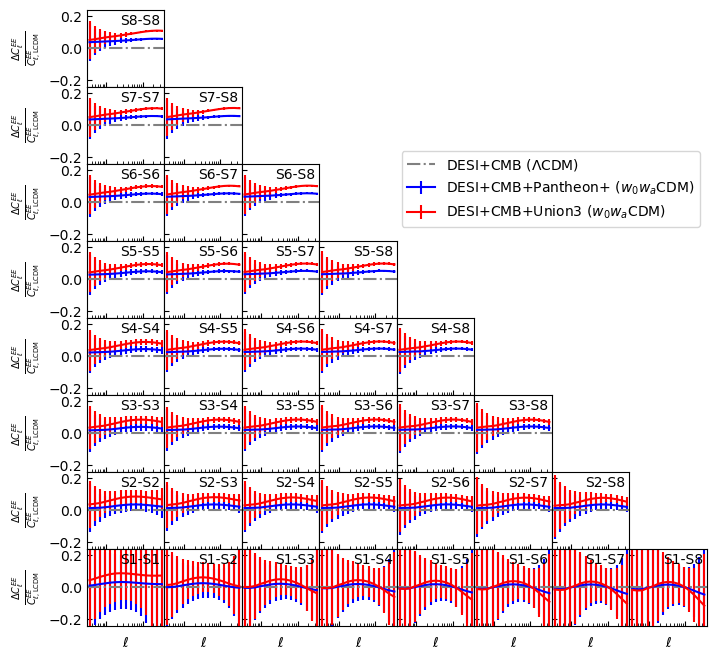

In [68]:
%matplotlib inline
fig, axes = plt.subplots(8,8,figsize=(8,8), sharex=True, sharey=True)

ct = 0
for i in range(8):
    for j in range(i,8):
        ax = axes[7-i,j-i]
        start = ct*15
        end = (ct+1)*15
        m = mask[start:end] == 1
        d = dv_lcdm[start:end]
        d_P = dv_wwcdm_P[start:end]
        d_U = dv_wwcdm_U[start:end]
        yerr = err[start:end]
        
        #ax.loglog(ell[m], d[m], color='k')
        ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=yerr/d[m], color='blue', 
                    label='DESI+CMB+Pantheon+ ($w_0w_a$CDM)' if i==j==0 else '')
        ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=yerr/d[m], color='red', 
                    label='DESI+CMB+Union3 ($w_0w_a$CDM)' if i==j==0 else '')
        ax.text(0.95, 0.95, f'S{i+1}-S{j+1}', va='top', ha='right', transform=ax.transAxes, fontsize=10)
        ax.axhline(0, ls='-.', color='grey', label='DESI+CMB ($\Lambda$CDM)' if i==j==0 else '')
        ax.set(xscale='log', ylim=[-0.24, 0.24], xlim=[30,4000])
        ax.tick_params(which='both', axis='both', direction='in') 
        if i==0:
            ax.set(xlabel='$\ell$')
        else:
            ax.set(xticklabels=[])
        if j==i:
            ax.set_ylabel(r'$\frac{\Delta C^{EE}_\ell}{C^{EE}_{\ell,\mathrm{LCDM}}}$', fontsize=10)
        #else:
        #    ax.set(yticklabels=[])
        ct += 1
    for j in range(i):
        ax = axes[j,i]
        ax.set_visible(False)
fig.legend(bbox_to_anchor=(0.5, 0.6, 0.4, 0.2), loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0)

/tmp/ipykernel_10366/3054929158.py:17: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue',
/tmp/ipykernel_10366/3054929158.py:17: RuntimeWarning: divide by zero encountered in divide
  ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue',
/tmp/ipykernel_10366/3054929158.py:19: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red',
/tmp/ipykernel_10366/3054929158.py:19: RuntimeWarning: divide by zero encountered in divide
  ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red',


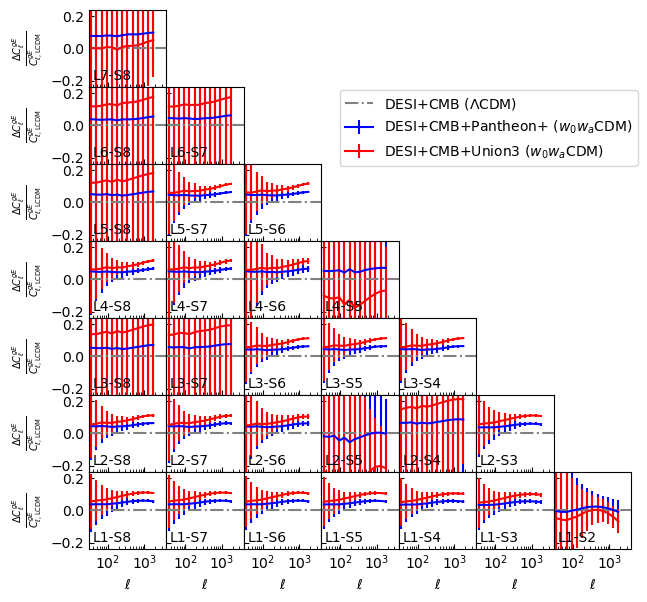

In [67]:
fig, axes = plt.subplots(8,8,figsize=(8,8), sharex=True, sharey=True)

removed_pairs = [(4,0),(5,0),(6,0),(6,1),(6,2),(7,0),(7,1),(7,2),(7,3)] # L-S
ct = N_clEE
for ilen in range(8):
    for isrc in range(8):
        ax = axes[7-ilen,7-isrc]
        if ((ilen, isrc) not in removed_pairs) and (ilen<isrc):
            start = ct*15
            end = (ct+1)*15
            d = dv_lcdm[start:end]
            d_P = dv_wwcdm_P[start:end]
            d_U = dv_wwcdm_U[start:end]
            yerr = err[start:end]

            #ax.loglog(ell[m], d[m], color='k')
            ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue', 
                        label='DESI+CMB+Pantheon+ ($w_0w_a$CDM)' if ilen==0 and isrc==7 else '')
            ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red', 
                        label='DESI+CMB+Union3 ($w_0w_a$CDM)' if ilen==0 and isrc==7 else '')
        
            #m = mask[start:end] == 1
            #d = data_vector[start:end]
            #ax.loglog(ell[m], d[m])
            ax.text(0.05, 0.05, f'L{ilen+1}-S{isrc+1}', va='bottom', ha='left', transform=ax.transAxes, fontsize=10)

            ax.tick_params(which='both', axis='both', direction='in') 
            if ilen==0:
                ax.set(xlabel='$\ell$')
            #else:
            #ax.set(xticklabels=[])
            if isrc==7:
                ax.set(ylabel=r'$\frac{\Delta C^{gE}_\ell}{C^{gE}_{\ell, \mathrm{LCDM}}}$')
            #else:
            #    ax.set(yticklabels=[])
            ax.axhline(0, ls='-.', color='grey', label='DESI+CMB ($\Lambda$CDM)' if ilen==0 and isrc==7 else '')
            ax.set(xscale='log', ylim=[-0.24, 0.24], xlim=[30,4000])
            ct+=1
        else:
            ax.set_visible(False)
fig.legend(bbox_to_anchor=(0.43, 0.58, 0.1, 0.1), loc='lower left')
plt.subplots_adjust(wspace=0, hspace=0)

In [53]:
data_vector[N_clEE*15 + 10*15: N_clEE*15 + 11*15]

array([2.352565e-07, 1.863233e-07, 1.410213e-07, 1.077660e-07,
       7.123018e-08, 4.521751e-08, 2.806215e-08, 1.746001e-08,
       1.112214e-08, 7.391857e-09, 5.112418e-09, 3.601116e-09,
       2.517575e-09, 0.000000e+00, 0.000000e+00])

/tmp/ipykernel_10366/1262826327.py:15: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue',
/tmp/ipykernel_10366/1262826327.py:15: RuntimeWarning: divide by zero encountered in divide
  ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue',
/tmp/ipykernel_10366/1262826327.py:17: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red',
/tmp/ipykernel_10366/1262826327.py:17: RuntimeWarning: divide by zero encountered in divide
  ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red',


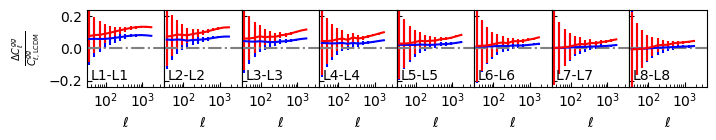

In [66]:
fig, axes = plt.subplots(1,8,figsize=(8,1), sharex=True, sharey=True)

ct = N_clEE + N_clgE

for ilen in range(8):
    ax = axes[ilen]
    start = ct*15
    end = (ct+1)*15
    d = dv_lcdm[start:end]
    d_P = dv_wwcdm_P[start:end]
    d_U = dv_wwcdm_U[start:end]
    yerr = err[start:end]

    #ax.loglog(ell[m], d[m], color='k')
    ax.errorbar(ell[m], d_P[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='blue', 
                label='DESI+CMB+Pantheon+ (w0waCDM)' if ilen==isrc==0 else '')
    ax.errorbar(ell[m], d_U[m]/d[m] - 1, yerr=np.abs(yerr[m]/d[m]), color='red', 
                label='DESI+CMB+Union3 (w0waCDM)' if ilen==isrc==0 else '')
    ax.text(0.05, 0.05, f'L{ilen+1}-L{ilen+1}', va='bottom', ha='left', transform=ax.transAxes, fontsize=10)
    ax.axhline(0, ls='-.', color='grey', label='DESI+CMB (LCDM)' if ilen==isrc==0 else '')
    ax.set(xscale='log', ylim=[-0.24, 0.24], xlim=[30,4000])
    ax.tick_params(which='both', axis='both', direction='in') 
    ax.set(xlabel='$\ell$')
    if ilen==0:
        ax.set(ylabel=r'$\frac{\Delta C^{gg}_\ell}{C^{gg}_{\ell,\mathrm{LCDM}}}$')
    ct+=1
plt.subplots_adjust(wspace=0, hspace=0)

# Show Data Vectors

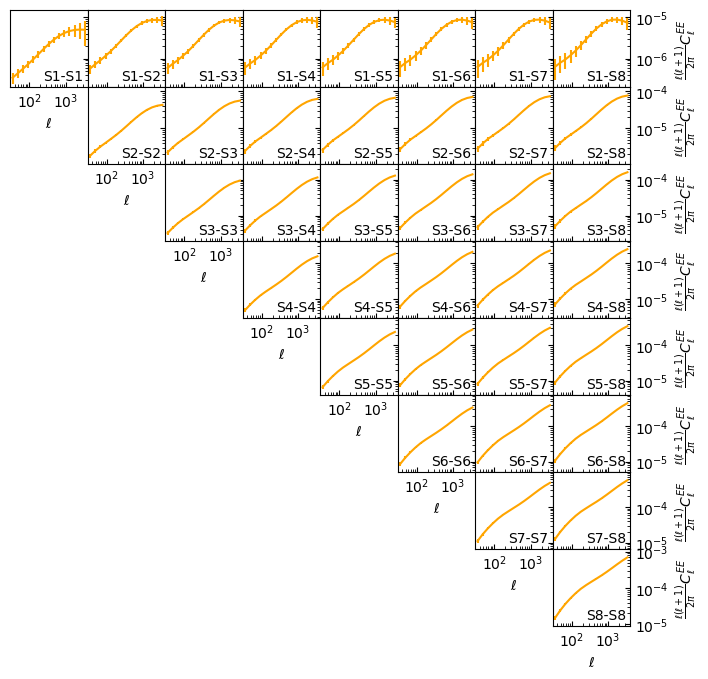

In [40]:
%matplotlib inline
fig, axes = plt.subplots(8,8,figsize=(8,8), sharex=False)

ct = 0
for i in range(8):
    y_range = [np.inf, -np.inf]
    for j in range(i,8):
        ax = axes[i,j]
        start = ct*15
        end = (ct+1)*15
        m = mask[start:end] == 1
        d = dv_lcdm[start:end]
        d_P = dv_wwcdm_P[start:end]
        d_U = dv_wwcdm_U[start:end]
        yerr = err[start:end]
        prefactor = ell*(ell+1)/(2*np.pi)
        
        ax.errorbar(ell[m], d[m]*prefactor[m], yerr=yerr[m]*prefactor[m], color='orange')
        if np.min(d[m]*prefactor[m]) < y_range[0]:
            y_range[0] = np.min(d[m]*prefactor[m])
        if np.max(d[m]*prefactor[m]) > y_range[1]:
            y_range[1] = np.max(d[m]*prefactor[m])
        ax.text(0.95, 0.05, f'S{i+1}-S{j+1}', va='bottom', ha='right', transform=ax.transAxes, fontsize=10)
        #ax.axhline(0, ls='-.', color='grey', label='DESI+CMB ($\Lambda$CDM)' if i==j==0 else '')
        ax.set(xscale='log', yscale='log', #ylim=[-0.24, 0.24], 
               xlim=[30,4000])
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.tick_params(which='both', axis='both', direction='in') 
        if i==j:
            ax.set(xlabel='$\ell$')
        else:
            ax.set(xticklabels=[])
        if j==7:
            ax.set_ylabel(r'$\frac{\ell(\ell+1)}{2\pi}C^{EE}_\ell$', fontsize=10)
        else:
            ax.set(yticklabels=[])
        ct += 1
    for j in range(i,8):
        axes[i,j].set(ylim=[y_range[0]*0.6, y_range[1]*1.7])
    for j in range(i):
        ax = axes[i,j]
        ax.set_visible(False)
#fig.legend(bbox_to_anchor=(0.5, 0.6, 0.4, 0.2), loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0)

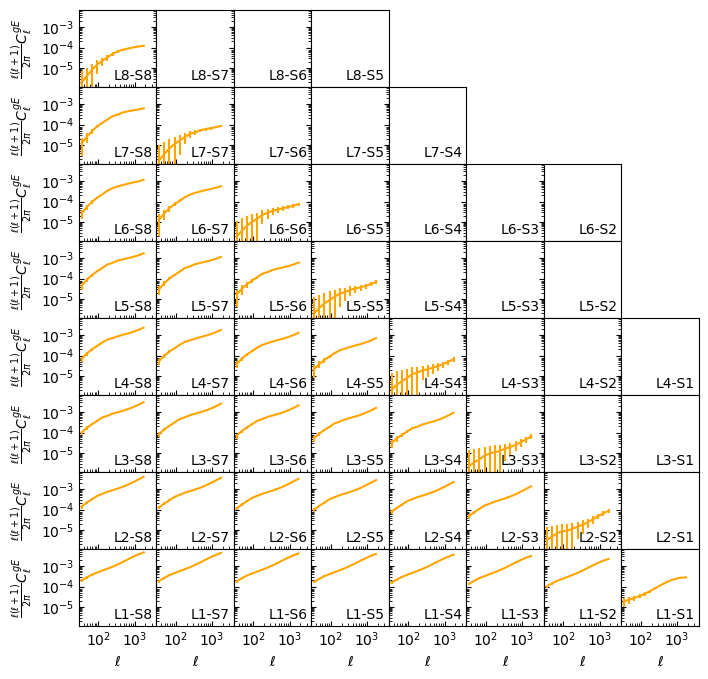

In [35]:
fig, axes = plt.subplots(8,8,figsize=(8,8), sharex=True, sharey=True)

removed_pairs = [(4,0),(5,0),(6,0),(6,1),(6,2),(7,0),(7,1),(7,2),(7,3)] # L-S
ct = N_clEE
for ilen in range(8):
    for isrc in range(8):
        ax = axes[7-ilen,7-isrc]
        if ((ilen, isrc) not in removed_pairs) and (ilen<=isrc):
            start = ct*15
            end = (ct+1)*15
            m = mask[start:end] == 1
            d = dv_lcdm[start:end]
            d_P = dv_wwcdm_P[start:end]
            d_U = dv_wwcdm_U[start:end]
            yerr = err[start:end]
            prefactor = ell*(ell+1)/(2*np.pi)

            ax.errorbar(ell[m], d[m]*prefactor[m], yerr=yerr[m]*prefactor[m], color='orange', )
        
            #m = mask[start:end] == 1
            #d = data_vector[start:end]
            #ax.loglog(ell[m], d[m])
            ax.text(0.95, 0.05, f'L{ilen+1}-S{isrc+1}', va='bottom', ha='right', transform=ax.transAxes, fontsize=10)

            ax.tick_params(which='both', axis='both', direction='in') 
            if ilen==0:
                ax.set(xlabel='$\ell$')
            #else:
            #ax.set(xticklabels=[])
            if isrc==7:
                ax.set(ylabel=r'$\frac{\ell(\ell+1)}{2\pi} C^{gE}_{\ell}$')
            #else:
            #    ax.set(yticklabels=[])
            ax.set(xscale='log', yscale='log',
                   #ylim=[-0.24, 0.24], 
                   xlim=[30,4000])
            ct+=1
        elif ((ilen, isrc) not in removed_pairs) and (ilen>isrc):
            ax.text(0.95, 0.05, f'L{ilen+1}-S{isrc+1}', va='bottom', ha='right', transform=ax.transAxes, fontsize=10)
            ct += 1
        else:
            ax.set_visible(False)
#fig.legend(bbox_to_anchor=(0.43, 0.58, 0.1, 0.1), loc='lower left')
plt.subplots_adjust(wspace=0, hspace=0)

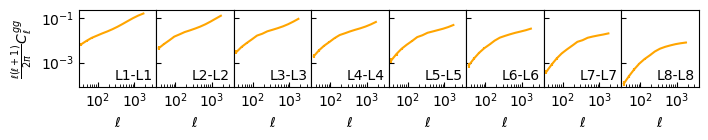

In [33]:
fig, axes = plt.subplots(1,8,figsize=(8,1), sharex=True, sharey=True)

ct = N_clEE + N_clgE

for ilen in range(8):
    ax = axes[ilen]
    start = ct*15
    end = (ct+1)*15
    m = mask[start:end] == 1
    d = dv_lcdm[start:end]
    d_P = dv_wwcdm_P[start:end]
    d_U = dv_wwcdm_U[start:end]
    yerr = err[start:end]
    prefactor = ell*(ell+1)/(2*np.pi)

    ax.errorbar(ell[m], d[m]*prefactor[m], yerr=yerr[m]*prefactor[m], color='orange')
    ax.text(0.95, 0.05, f'L{ilen+1}-L{ilen+1}', va='bottom', ha='right', transform=ax.transAxes, fontsize=10)
    ax.set(xscale='log', yscale='log', 
           #ylim=[-0.24, 0.24], 
           xlim=[30,4000])
    ax.tick_params(which='both', axis='both', direction='in') 
    ax.set(xlabel='$\ell$')
    if ilen==0:
        ax.set(ylabel=r'$\frac{\ell(\ell+1)}{2\pi}C^{gg}_{\ell}$')
    ct+=1
plt.subplots_adjust(wspace=0, hspace=0)